# Build the KNN model 

Now that the data is prepared we can build the model for predictions an evaluations. <br>
I will be using the K nearest neighbours model to find organisations that are similar to each other. 

In [3]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sqlalchemy import create_engine

%matplotlib inline

In [4]:
engine = create_engine('sqlite:///../data/orgs_customer_behaviours.db')
df_normalised_features = pd.read_sql_table('normalised_features', engine)
df_features = pd.read_sql_table('features_target_class', engine)

In [5]:
X = df_normalised_features
y = df_features['CONVERTED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_neighbors = 1
knn = KNeighborsClassifier(n_neighbors=num_neighbors)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [6]:
print(f'WITH K={num_neighbors}\n')
print('\nCONFUSION MATRIX:')
print(confusion_matrix(y_test, pred))
print('\nCLASSIFICATION REPORT:')
print(classification_report(y_test,pred))

WITH K=1


CONFUSION MATRIX:
[[49 51]
 [54 48]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.48      0.49      0.48       100
           1       0.48      0.47      0.48       102

    accuracy                           0.48       202
   macro avg       0.48      0.48      0.48       202
weighted avg       0.48      0.48      0.48       202



#### Improve the model with a better K value
The initial K value was arbitrary to prove the functioning of the model. <br>
Lets try to improve accuracy by finding a better K value for KNN

In [7]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

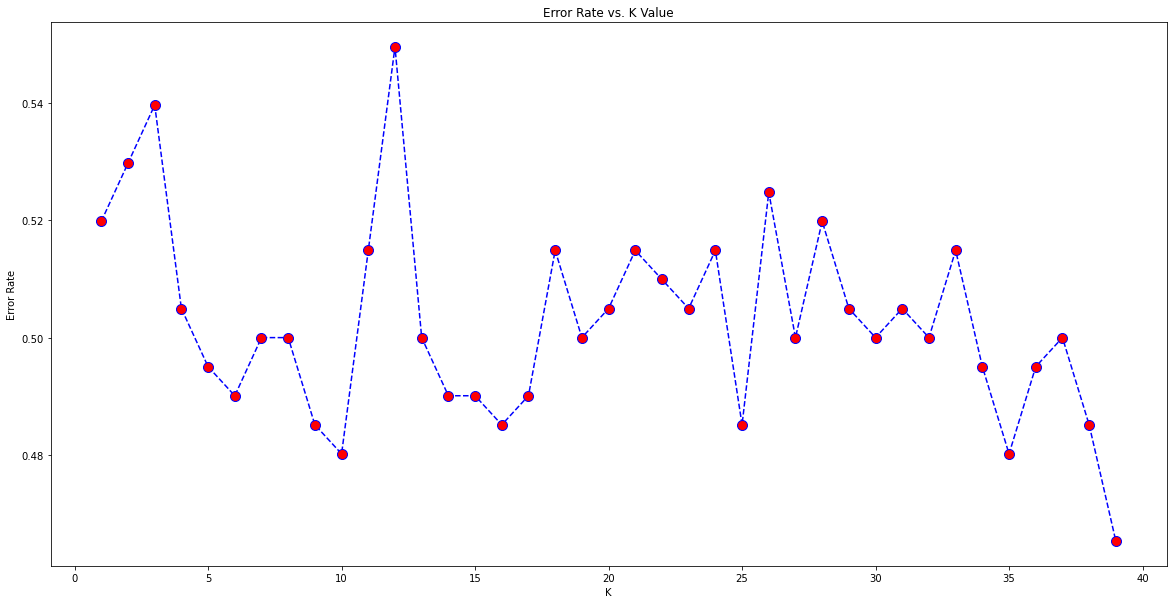

In [8]:
plt.figure(figsize=(20,10))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [9]:
num_neighbors = 40
knn = KNeighborsClassifier(n_neighbors=num_neighbors)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [10]:
print(f'WITH K={num_neighbors}\n')
print('\nCONFUSION MATRIX:')
print(confusion_matrix(y_test, pred))
print('\nCLASSIFICATION REPORT:')
print(classification_report(y_test,pred))

WITH K=40


CONFUSION MATRIX:
[[62 38]
 [53 49]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.54      0.62      0.58       100
           1       0.56      0.48      0.52       102

    accuracy                           0.55       202
   macro avg       0.55      0.55      0.55       202
weighted avg       0.55      0.55      0.55       202



In [14]:
grid_parameters = {
    'n_neighbors': [10, 18, 20, 25, 35, 40],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

gs = GridSearchCV(KNeighborsClassifier(), grid_parameters, verbose=1, cv=3, n_jobs=-1)

gs_results = gs.fit(X_train, y_train)

print(f'\n\nBest scores found are {gs_results.best_score_}\n\n')
print(f'Best results are found using estimator {gs_results.best_estimator_}\n\n')
print(f'The Best commbination of parameters are {gs_results.best_params_}\n\n')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s


Best scores found are 0.516728624535316


Best results are found using estimator KNeighborsClassifier(metric='euclidean', n_neighbors=40, weights='distance')


The Best commbination of parameters are {'metric': 'euclidean', 'n_neighbors': 40, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.4s finished


In [15]:
num_neighbors = 40
knn = KNeighborsClassifier(n_neighbors=num_neighbors, weights='distance', metric='euclidean')
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(f'WITH K={num_neighbors}\n')
print('\nCONFUSION MATRIX:')
print(confusion_matrix(y_test, pred))
print('\nCLASSIFICATION REPORT:')
print(classification_report(y_test,pred))

WITH K=40


CONFUSION MATRIX:
[[53 47]
 [51 51]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       100
           1       0.52      0.50      0.51       102

    accuracy                           0.51       202
   macro avg       0.52      0.52      0.51       202
weighted avg       0.52      0.51      0.51       202

